#Imports

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#1D Collisions

###1D collision Modelling (basic)

Here, we'll employ the following parameters to vary the collisions:


*   Initial velocity of the two projectiles
*   Coefficient of restitution
*   Masses of each

Some things that we'll output:
*   Position vs Time (For both projectiles) - Graphs + dataset
*   Velocity vs Time (For both projectiles) - Graphs + dataset


The main equations employed:
   $$m_1v_{1i}+m_2v_{2i} = m_1v_{1f}+m_2v_{2f} \quad\text{(conservation of momentum)}$$
   $$e = \frac{v_{2f} - v_{1f}}{v_{ia} - v_{ib}} \quad\text{(coefficient of restitution)}$$

Note that if no additional energy is added, $0\leq e\leq 1$


In [56]:
def single_collision_sim(m_0,m_1,v_0,v_1,restitution):
  p_0 = m_0*v_0+m_1*v_1
  total_mass = m_0+m_1
  rel_vel_0 = v_1-v_0
  v_0 = (p_0 + m_1*restitution*(rel_vel_0))/total_mass
  v_1 = (p_0-m_0*v_0)/m_1
  return (v_0,v_1)

# distance = 15
v_0 = 15
v_1 = 0
m_0 = 15
m_1 = 15
restitution = 0

single_collision_sim(m_0,m_1,v_0,v_1,restitution)



(7.5, 7.5)

### Multiple 1D collisions

Here we'll add in (two) additional parameters:


*   Position of each projectile
*   Time

Instead of having individual variables, we'll have arrays for the initial masses and velocities, respectively. For simplicity, we'll take the coefficient of restitution to be the same everywhere.

**Note**: The hard part might be keeping track of the collisions (discrete time = might overshoot positions!)



In [57]:
positions = [0,1,2,3,4] #For now, we'll make the positions array in increasing order, but we'll have to write an algorithm to implement this later!
velocities = [5,0,0,0,0]
masses = [3,3,3,3,3]
restitution = 1.5
time = 0
time_delta = 0.01
collision_count = 0
num_blocks = len(positions)
positions = np.array(positions).astype('float64')
velocities = np.array(velocities).astype('float64')
masses = np.array(masses).astype('float64')
# block_position_data = np.random.normal(0,0,(1,len(positions))).tolist()
# block_vel_data = np.random.normal(0,0,(1,len(velocities))).tolist()

block_position_data = []
block_vel_data = []


def check_collision(position_arr):
  """
  Checks if a collision has occured
  """
  global collision_count
  collisions = []
  for i in range(len(position_arr)-1): #inspiration for a circular world here!
      if position_arr[i]-position_arr[i+1]>=-0.95+0.94999999999999:
        collisions.append(i)
        collision_count+=1
  return collisions

def update_metrics():
  global positions, velocities, masses, restitution
  #How to account for multiple collisions at once? --> Need some if-else statement for that?
  collisions = check_collision(positions.tolist())
  for i in collisions:
    vel_pair = single_collision_sim(masses[i],masses[i+1],velocities[i],velocities[i+1],restitution)
    velocities[i] = vel_pair[0]
    velocities[i+1] = vel_pair[1]

def simulation_ongoing():
  """
  Checks if there are any more collisions to occur
  """
  for i in range(len(velocities)-1):
    if (velocities[i+1] - velocities[i] < 0):
      return True
  return False

## Running the simulations
while (simulation_ongoing()):
  # counter+=1
  block_position_data.append(positions.tolist())
  block_vel_data.append(velocities.tolist())

  update_metrics()
  # print(counter)
  time+= time_delta

  positions += velocities*time_delta






### Multiple 1D Collision Graphs

Here, we'll implement matplot lib libraries to generate some visuals of (x vs t) and (v vs t) for each block.

<ipython-input-58-9ee8c3a4136c>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


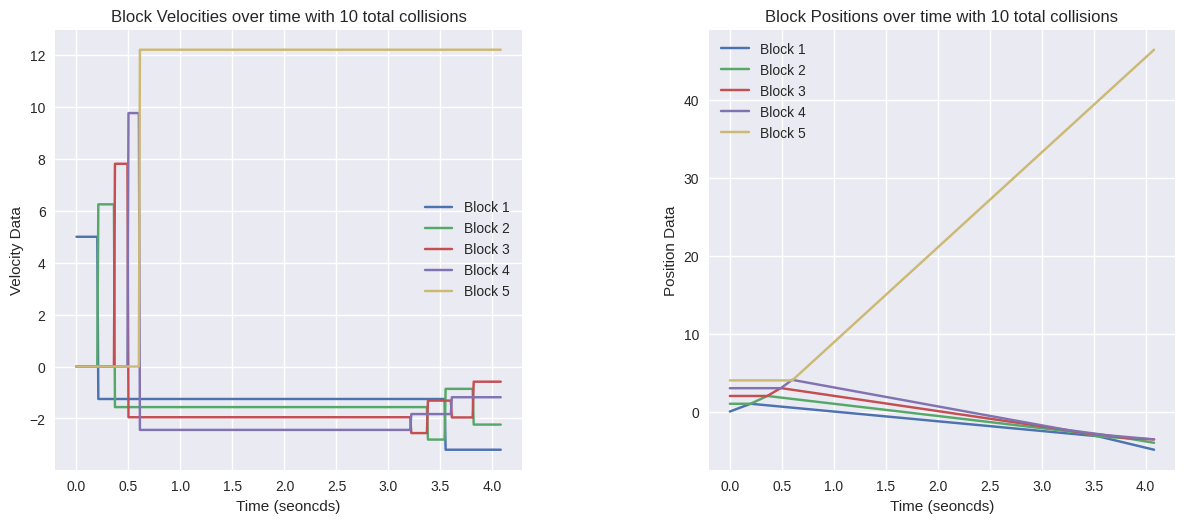

In [58]:
def legend_gen(num):
  legend = []
  for i in range(num):
    legend.append("Block " + str((i+1)))
  return legend

def draw_time_graphs(ax, data, time_delta,y_axis,title="Title", x_axis="Time (seoncds)", log=False):
  datapoints = len(data)
  time_series = []
  for i in range(datapoints):
    time_series.append((i)*time_delta)
  ax.set_title(title)
  ax.set_xlabel(x_axis)
  ax.set_ylabel(y_axis)
  for i in range(num_blocks):
    ax.plot(time_series, data[:,i])
  ax.legend(legend_gen(num_blocks))
  if log:
    ax.set_yscale("log")
  # ax.tight_layout()
  # ax.show()
plt.style.use('seaborn')
fig,ax = plt.subplots(nrows=1, ncols=2)
draw_time_graphs(ax[0], np.array(block_vel_data), time_delta, y_axis="Velocity Data", title="Block Velocities over time with " + str(collision_count) + " total collisions", x_axis="Time (seoncds)")
draw_time_graphs(ax[1], np.array(block_position_data), time_delta, y_axis="Position Data", title="Block Positions over time with " + str(collision_count) + " total collisions", x_axis="Time (seoncds)")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


### Final Results

Here, we'll compose a function that takes everything into account. Just input all the necessary parameters, and it should:


1.   Output the graphs and save them in a file
2.   Generate the list of data and save them in a file as well (xlsx)
3.   Output the number of collisions that occured over the entire timeframe

Some additional features/parameters:

1.  All the arrays (position, velocity, mass)
2.  time_delta (the time increment)
3.  Walls? (left, right)
4.  Restitution coefficient (we'll just have one coefficient for now)

Shown below is a phenomenon explaiend by [this video](https://www.youtube.com/watch?v=HEfHFsfGXjs) (computing pi through colliding blocks!)



<ipython-input-59-6c4eeb30a93d>:84: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


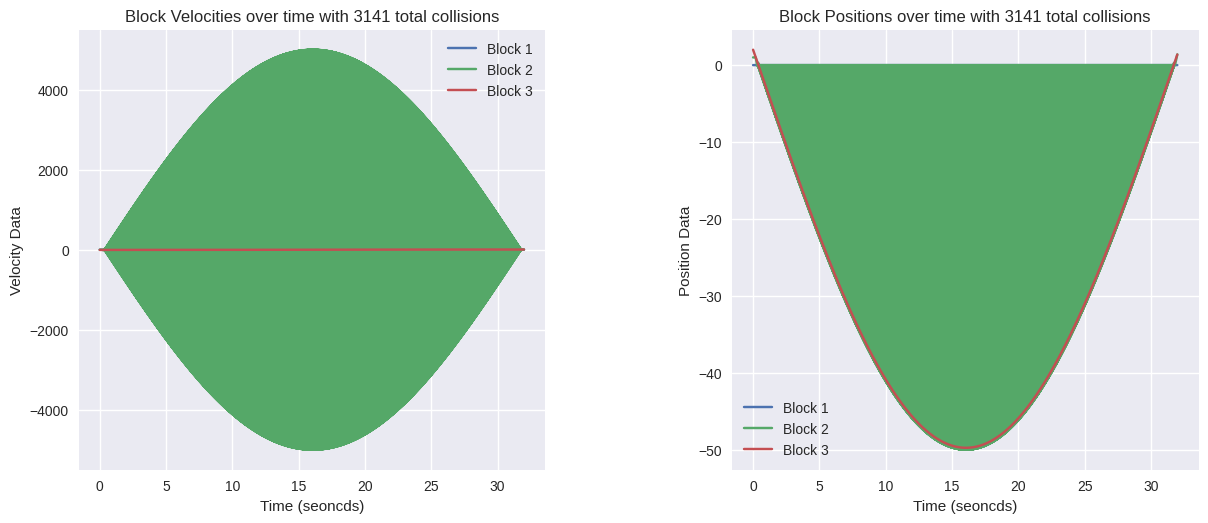

10


In [59]:
def run_simulation(positions, velocities, masses, restitution):
  """  Generates and saves the graph and data on positions + velocities of objects in question given initial conditions

  @param: Initial positions, velocities, masses, and
  """

  positions = np.array(positions).astype('float64')
  velocities = np.array(velocities).astype('float64')
  masses = np.array(masses).astype('float64')
  collision_count = 0
  time=0
  time_delta=0.01
  block_vel_data = []
  block_position_data = []
  num_blocks = positions.size
  def single_collision_sim(m_0,m_1,v_0,v_1,restitution):
    p_0 = m_0*v_0+m_1*v_1
    total_mass = m_0+m_1
    rel_vel_0 = v_1-v_0
    v_0 = (p_0 + m_1*restitution*(rel_vel_0))/total_mass
    v_1 = (p_0-m_0*v_0)/m_1
    return (v_0,v_1)
  def check_collision(position_arr):
    """
    Checks if a collision has occured
    """
    collisions = []
    for i in range(len(position_arr)-1): #inspiration for a circular world here!
        if position_arr[i]-position_arr[i+1]>=-0.95+0.94999999999999:
          collisions.append(i)
    return collisions

  def update_metrics():
    nonlocal positions, velocities, masses, restitution, collision_count
    #How to account for multiple collisions at once? --> Need some if-else statement for that?
    collisions = check_collision(positions.tolist())
    for i in collisions:
      vel_pair = single_collision_sim(masses[i],masses[i+1],velocities[i],velocities[i+1],restitution)
      collision_count+=1
      velocities[i] = vel_pair[0]
      velocities[i+1] = vel_pair[1]

  def simulation_ongoing():
    """
    Checks if there are any more collisions to occur
    """
    for i in range(len(velocities)-1):
      if (velocities[i+1] - velocities[i] < 0):
        return True
    return False

  ## Running the simulations
  while (simulation_ongoing()):
    # counter+=1
    block_position_data.append(positions.tolist())
    block_vel_data.append(velocities.tolist())

    update_metrics()
    # print(counter)
    time+= time_delta

    positions += velocities*time_delta
  def legend_gen(num):
    legend = []
    for i in range(num):
      legend.append("Block " + str((i+1)))
    return legend

  def draw_time_graphs(ax, data, time_delta,y_axis,title="Title", x_axis="Time (seoncds)", log=False):
    datapoints = len(data)
    time_series = []
    for i in range(datapoints):
      time_series.append((i)*time_delta)
    ax.set_title(title)
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    for i in range(num_blocks):
      ax.plot(time_series, data[:,i])
    ax.legend(legend_gen(num_blocks))
    if log:
      ax.set_yscale("log")
    # ax.tight_layout()
    # ax.show()
  plt.style.use('seaborn')
  fig,ax = plt.subplots(nrows=1, ncols=2)
  draw_time_graphs(ax[0], np.array(block_vel_data), time_delta, y_axis="Velocity Data", title="Block Velocities over time with " + str(collision_count) + " total collisions", x_axis="Time (seoncds)")
  draw_time_graphs(ax[1], np.array(block_position_data), time_delta, y_axis="Position Data", title="Block Positions over time with " + str(collision_count) + " total collisions", x_axis="Time (seoncds)")
  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=1.5,
                      top=0.9,
                      wspace=0.4,
                      hspace=0.4)
  plt.savefig("x-v-analysis.png")
  pd.DataFrame(block_position_data, ).to_csv("Block-Postion-Data.csv")
  pd.DataFrame(block_vel_data).to_csv("Block-Velocity-Data.csv")

  plt.show()
positions = [0,1,2] #For now, we'll make the positions array in increasing order, but we'll have to write an algorithm to implement this later!
velocities = [0,0,-5]
masses = [1e99,1,1000000]
restitution = 1
positions = np.array(positions).astype('float64')
velocities = np.array(velocities).astype('float64')
masses = np.array(masses).astype('float64')
# collision_count = 0
run_simulation(positions, velocities, masses, restitution)
print(collision_count)

### Further Experimentation

Potential next steps:



1.   Collisions with walls (we'll set the walls to have an arbitrarily high mass and have their coefficient of restitution be exactly 1)
2.   Generating Pi. [Check this video out](https://www.youtube.com/watch?v=jsYwFizhncE&pp=ygUXM2JsdWUgMSBicm93biBtYWtpbmcgcGk%3D)
3.   Under what conditions should be imposed on $n$ velocities to have $\binom n 2$? (first, assuming elastic)
